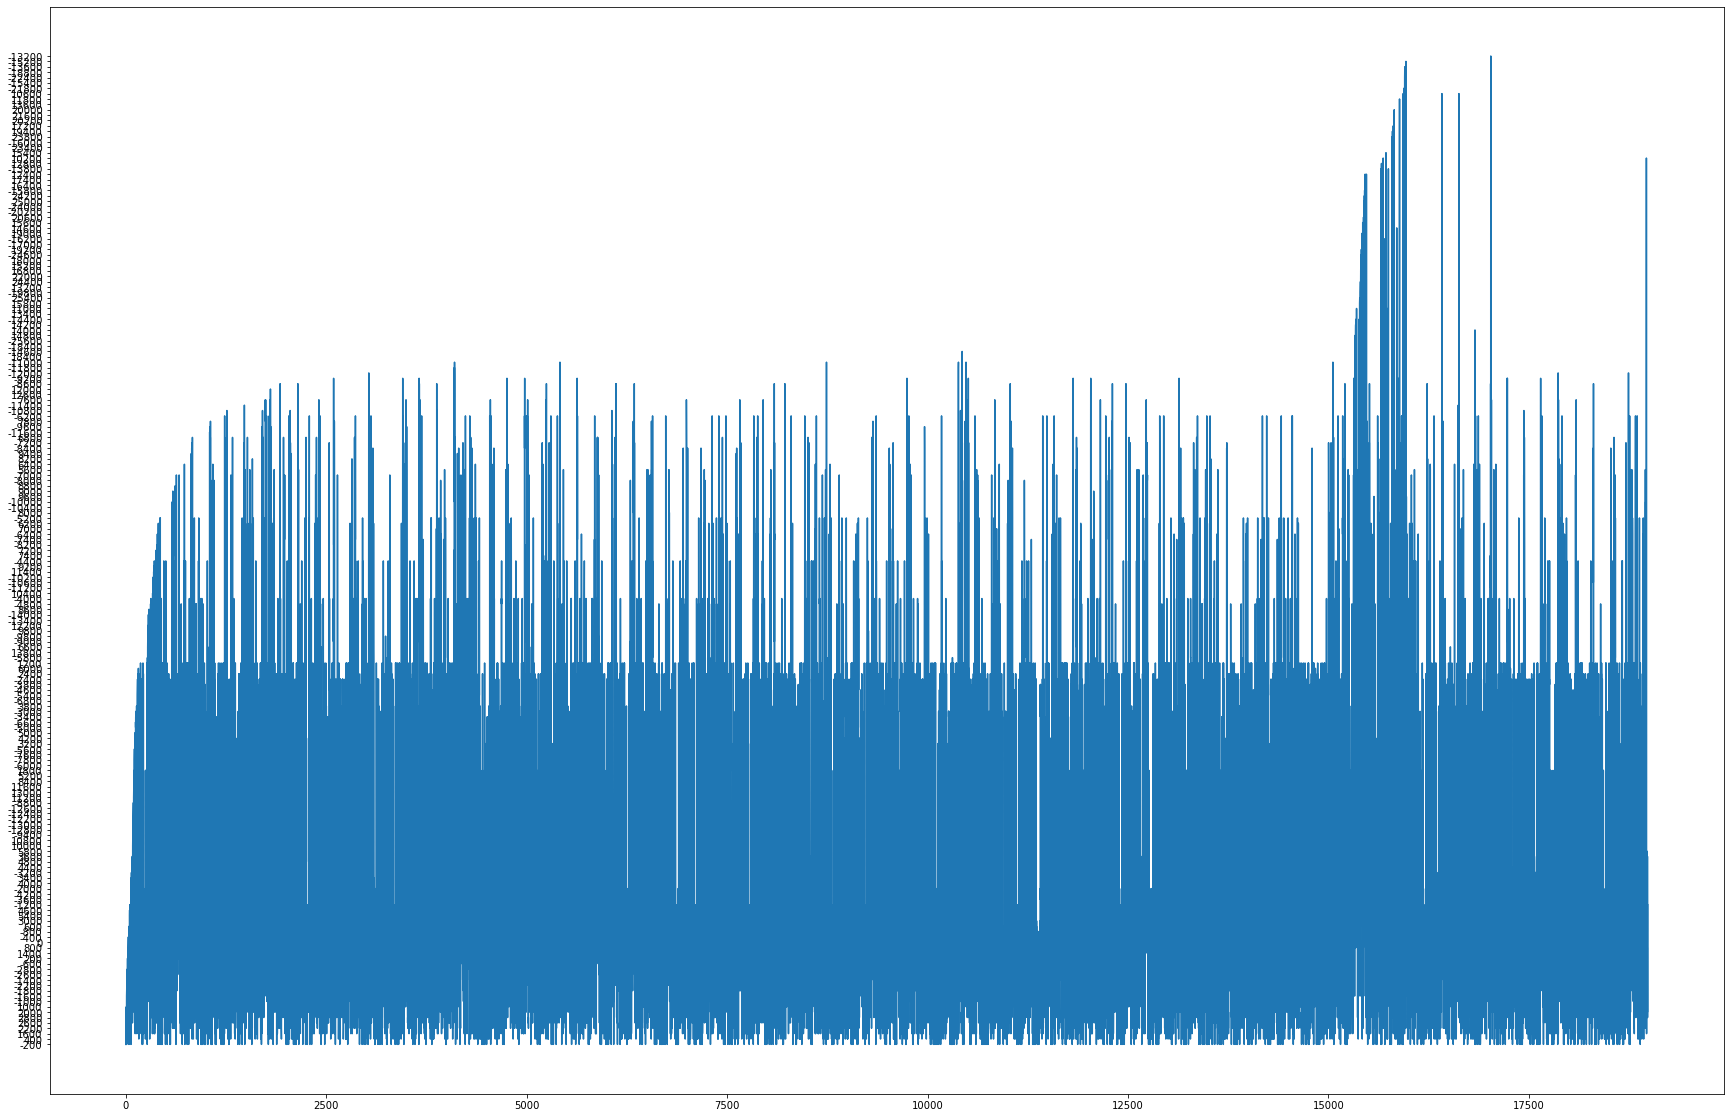

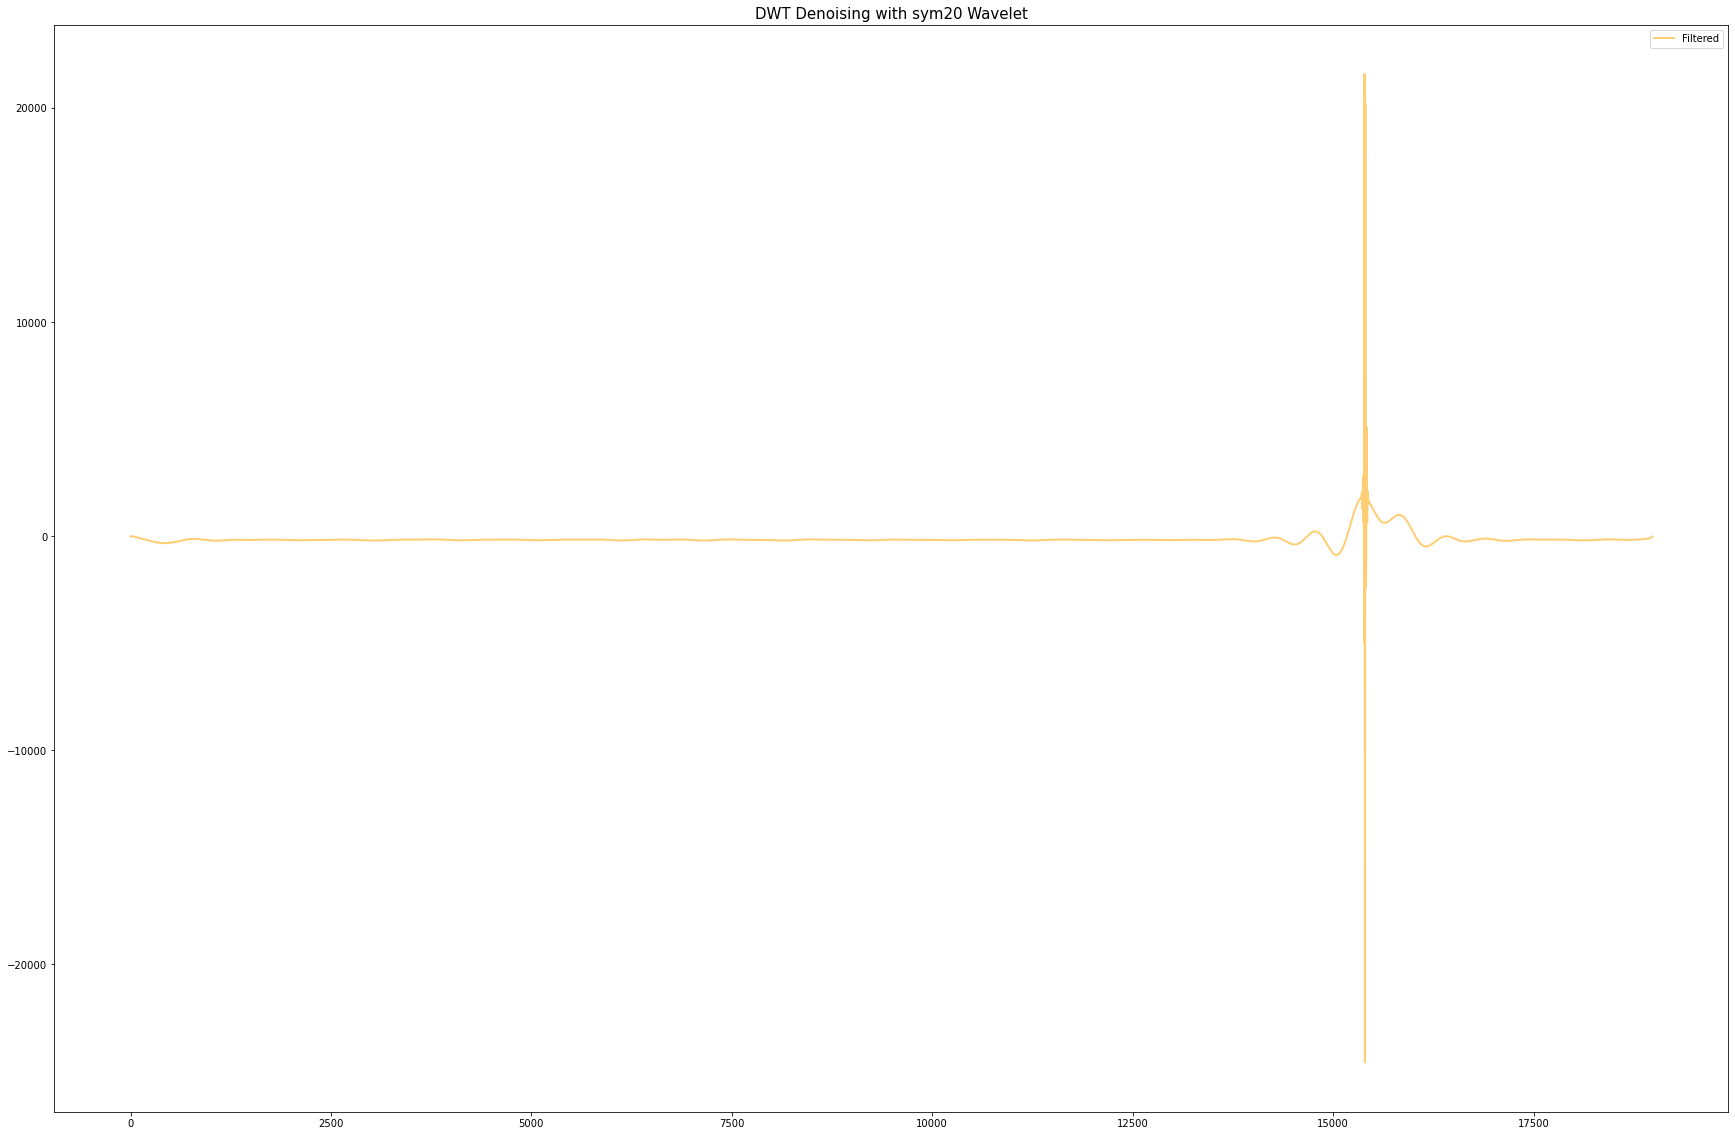

In [1]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P02_GW_31_till_end - PCG_P02_GW_31_till_end.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][1000:19982].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db8', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.32580343) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered = wavelet_denoising(signal, wavelet=wav, level=3)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered = wavelet_denoising(signal, wavelet=wav, level=3)  
signal = df['PCG'][1000:19982].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

In [2]:
import wave

In [3]:
file = wave.open('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\yes.wav')

In [4]:
print('no of channels: ', file.getnchannels())

no of channels:  1


In [6]:
print("sampling freq : ", file.getframerate())

sampling freq :  16000


In [7]:
print(" sample width :" , file.getsampwidth())

 sample width : 2


In [8]:
print("no of frames: ", file.getnframes())

no of frames:  19980
